<a href="https://colab.research.google.com/github/itberrios/CV_projects/blob/main/RAFT/RAFT_exploration.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **RAFT Starter**

In this notebook we will learn how to use Recurrent All-Pairs Field Transforms (RAFT) for DIC

## **RAFT-PIV Models**

RAFT has pretrained models:

 - raft-PIV


Clone the repo and import libraries

In [ ]:
!git clone https://github.com/UTAmegg/RAFT-PIV.git

Cloning into 'RAFT-PIV'...
remote: Enumerating objects: 48, done.
remote: Counting objects: 100% (48/48), done.
remote: Compressing objects: 100% (44/44), done.
remote: Total 48 (delta 3), reused 0 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (48/48), 25.30 MiB | 9.90 MiB/s, done.
Resolving deltas: 100% (3/3), done.


In [ ]:
import os
import sys
import numpy as np
import cv2
import pandas as pd

import torch
import torch.nn as nn
import torch.nn.functional as F

import matplotlib.pyplot as plt
%matplotlib inline

Add RAFT core to path

In [ ]:
sys.path.append('RAFT-PIV/core')

Load the images from the Github

(1) For .tif format of images

In [ ]:
import cv2
import requests
import numpy as np
import matplotlib.pyplot as plt  # Import matplotlib to display images

# URL of the images
url1 = "https://github.com/UTAmegg/14171_IOP_10_long/raw/main/14171_1_10990_044_PIXEL_ASPECT.png"
url2 = "https://github.com/UTAmegg/14171_IOP_10_long/raw/main/14171_1_13187_044_PIXEL_ASPECT.png"
url3 = "https://github.com/UTAmegg/i14171_IOP_10_long/raw/main/14171_1_13187_044_PIXEL_ASPECT.png"

# Function to download and process an image from a URL
def load_and_resize_image(url, scale_factor=1/5):
    # Download the image from GitHub
    response = requests.get(url)
    img_array = np.asarray(bytearray(response.content), dtype=np.uint8)
    frame = cv2.imdecode(img_array, cv2.IMREAD_UNCHANGED)  # Load original image without changing color format

    # Get the dimensions of the image
    original_height, original_width = frame.shape[:2]

    # Calculate new dimensions (1/5 of the original size)
    new_width = int(original_width * scale_factor)
    new_height = int(original_height * scale_factor)

    # Resize the image
    resized_frame = cv2.resize(frame, (new_width, new_height), interpolation=cv2.INTER_AREA)

    # Convert the resized image from BGR to RGB for matplotlib display
    resized_frame_rgb = cv2.cvtColor(resized_frame, cv2.COLOR_BGR2RGB)

    return resized_frame_rgb

# Load, resize, and convert images
frame1_resized = load_and_resize_image(url1)
frame2_resized = load_and_resize_image(url2)
frame3_resized = load_and_resize_image(url3)

# Display the resized images
_, ax = plt.subplots(1, 3, figsize=(20, 10))
ax[0].imshow(frame1_resized)
ax[0].set_title("Frame 1")
#ax[0].axis('off')  # Hide axes for better visual

ax[1].imshow(frame2_resized)
ax[1].set_title("Frame 2")
#ax[1].axis('off')  # Hide axes for better visual

ax[2].imshow(frame3_resized)
ax[2].set_title("Frame 3 ")
#ax[2].axis('off')  # Hide axes for better visual

# Show the images
plt.show()


AttributeError: 'NoneType' object has no attribute 'shape'

(2) For .tiff format of images

In [ ]:
import cv2
import requests
import numpy as np
import matplotlib.pyplot as plt  # Import matplotlib to display images

# URL of the images
url1 = "https://github.com/UTAmegg/img_TaofracPoron6/raw/main/Camera_20_00_19_001.tiff"
url2 = "https://github.com/UTAmegg/img_TaofracPoron6/raw/main/Camera_20_00_19_128.tiff"
url3 = "https://github.com/UTAmegg/img_TaofracPoron6/raw/main/Camera_20_00_19_070.tiff"

# Function to download and process an image from a URL
def load_and_resize_image(url, scale_factor=1):
    # Download the image from GitHub
    response = requests.get(url)
    img_array = np.asarray(bytearray(response.content), dtype=np.uint8)
    frame = cv2.imdecode(img_array, cv2.IMREAD_UNCHANGED)  # Load original image without changing color format

    # Ensure the image data is in the correct range for imshow (0-255 for integers)
    if frame.dtype != np.uint8:
        frame = cv2.normalize(frame, None, 0, 255, cv2.NORM_MINMAX).astype(np.uint8)

    # Get the dimensions of the image
    original_height, original_width = frame.shape[:2]

    # Calculate new dimensions (1/5 of the original size)
    new_width = int(original_width * scale_factor)
    new_height = int(original_height * scale_factor)

    # Resize the image
    resized_frame = cv2.resize(frame, (new_width, new_height), interpolation=cv2.INTER_AREA)

    # Convert the resized image from BGR to RGB for matplotlib display
    resized_frame_rgb = cv2.cvtColor(resized_frame, cv2.COLOR_BGR2RGB)

    return resized_frame_rgb

# Load, resize, and convert images
frame1_resized = load_and_resize_image(url1)
frame2_resized = load_and_resize_image(url2)
frame3_resized = load_and_resize_image(url3)

# Display the resized images
_, ax = plt.subplots(1, 3, figsize=(20, 10))
ax[0].imshow(frame1_resized)
ax[0].set_title("Frame 1 ")

ax[1].imshow(frame2_resized)
ax[1].set_title("Frame 2 ")

ax[2].imshow(frame3_resized)
ax[2].set_title("Frame 3 ")

# Show the images
plt.show()


AttributeError: 'NoneType' object has no attribute 'dtype'

(3)For png format

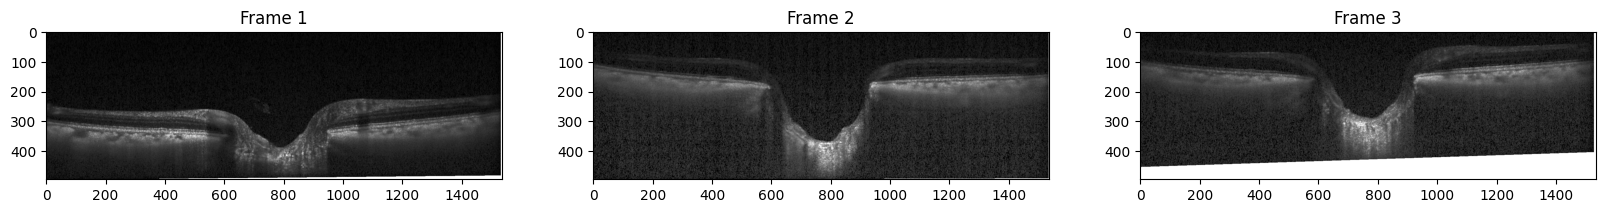

In [ ]:
import cv2
import requests
import numpy as np
import matplotlib.pyplot as plt

# URL of the images
url1 = "https://github.com/UTAmegg/14171_IOP_10_long/raw/main/14171_1_8893_044_PIXEL_ASPECT.png"
url2 = "https://github.com/UTAmegg/14171_IOP_10_long/raw/main/14171_1_16113_044_PIXEL_ASPECT.png"
url3 = "https://github.com/UTAmegg/14171_IOP_10_long/raw/main/14171_1_13187_044_PIXEL_ASPECT.png"

# Function to download and process an image from a URL
def load_and_resize_image(url, scale_factor=1):
    try:
        # Download the image from GitHub
        response = requests.get(url)
        response.raise_for_status()  # Raise an error for bad status codes (like 404)

        img_array = np.asarray(bytearray(response.content), dtype=np.uint8)
        frame = cv2.imdecode(img_array, cv2.IMREAD_UNCHANGED)  # Load original image

        # Check if the image was loaded correctly
        if frame is None:
            print(f"Error: Image at {url} could not be decoded.")
            return None

        # Get the dimensions of the image
        original_height, original_width = frame.shape[:2]

        # Calculate new dimensions (based on the scale factor)
        new_width = int(original_width * scale_factor)
        new_height = int(original_height * scale_factor)

        # Resize the image
        resized_frame = cv2.resize(frame, (new_width, new_height), interpolation=cv2.INTER_AREA)

        # Convert the resized image from BGR to RGB for matplotlib display
        resized_frame_rgb = cv2.cvtColor(resized_frame, cv2.COLOR_BGR2RGB)

        return resized_frame_rgb

    except requests.exceptions.RequestException as e:
        print(f"Error downloading image from {url}: {e}")
        return None

# Load, resize, and convert images
frame1_resized = load_and_resize_image(url1)
frame2_resized = load_and_resize_image(url2)
frame3_resized = load_and_resize_image(url3)

# Display the resized images only if they were successfully loaded
if frame1_resized is not None and frame2_resized is not None and frame3_resized is not None:
    _, ax = plt.subplots(1, 3, figsize=(20, 10))

    ax[0].imshow(frame1_resized)
    ax[0].set_title("Frame 1")

    ax[1].imshow(frame2_resized)
    ax[1].set_title("Frame 2")

    ax[2].imshow(frame3_resized)
    ax[2].set_title("Frame 3")

    plt.show()
else:
    print("One or more images could not be loaded.")


## Download models

In [ ]:
%cd RAFT-PIV

%cd ..

/content/RAFT-PIV
/content


### Helper functions

In [ ]:
from collections import OrderedDict
from raft import RAFT
from utils import flow_viz
from utils.utils import InputPadder



def process_img(img, device):
    return torch.from_numpy(img).permute(2, 0, 1).float()[None].to(device)


def load_model(weights_path, args):
    model = RAFT(args)
    pretrained_weights = torch.load(weights_path, map_location=torch.device("cpu"))
    model = torch.nn.DataParallel(model)
    model.load_state_dict(pretrained_weights)
    model.to("cuda")
    return model


def inference(model, frame1, frame2, device, pad_mode='sintel',
              iters=12, flow_init=None, upsample=True, test_mode=True):

    model.eval()
    with torch.no_grad():
        # preprocess
        frame1 = process_img(frame1, device)
        frame2 = process_img(frame2, device)

        padder = InputPadder(frame1.shape, mode=pad_mode)
        frame1, frame2 = padder.pad(frame1, frame2)

        # predict flow
        if test_mode:
          flow_low, flow_up = model(frame1,
                                    frame2,
                                    iters=iters,
                                    flow_init=flow_init,
                                    upsample=upsample,
                                    test_mode=test_mode)



          return flow_low, flow_up

        else:
            flow_iters = model(frame1,
                               frame2,
                               iters=iters,
                               flow_init=flow_init,
                               upsample=upsample,
                               test_mode=test_mode)

            return flow_iters


def get_viz(flo):
    flo = flo[0].permute(1,2,0).cpu().numpy()
    return flow_viz.flow_to_image(flo)

# sketchy class to pass to RAFT
class Args():
  def __init__(self, model='', path='', small=False, mixed_precision=True, alternate_corr=False):
    self.model = model
    self.path = path
    self.small = small
    self.mixed_precision = mixed_precision
    self.alternate_corr = alternate_corr

  """ Sketchy hack to pretend to iterate through the class objects """
  def __iter__(self):
    return self

  def __next__(self):
    raise StopIteration

### Load Model

In [ ]:
model = load_model("RAFT-PIV/models/raft-piv.pth", args=Args())

<ipython-input-6-f4e815d0e7fd>:14: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  pretrained_weights = torch.load(weights_path, map_location=torch.device("cpu"))


### Prediction

In [ ]:
flow_low, flow_up = inference(model, frame1_resized, frame2_resized, device='cuda')

In [ ]:
flow_low.shape, flow_up.shape

(torch.Size([1, 2, 62, 192]), torch.Size([1, 2, 496, 1536]))

### Display Results

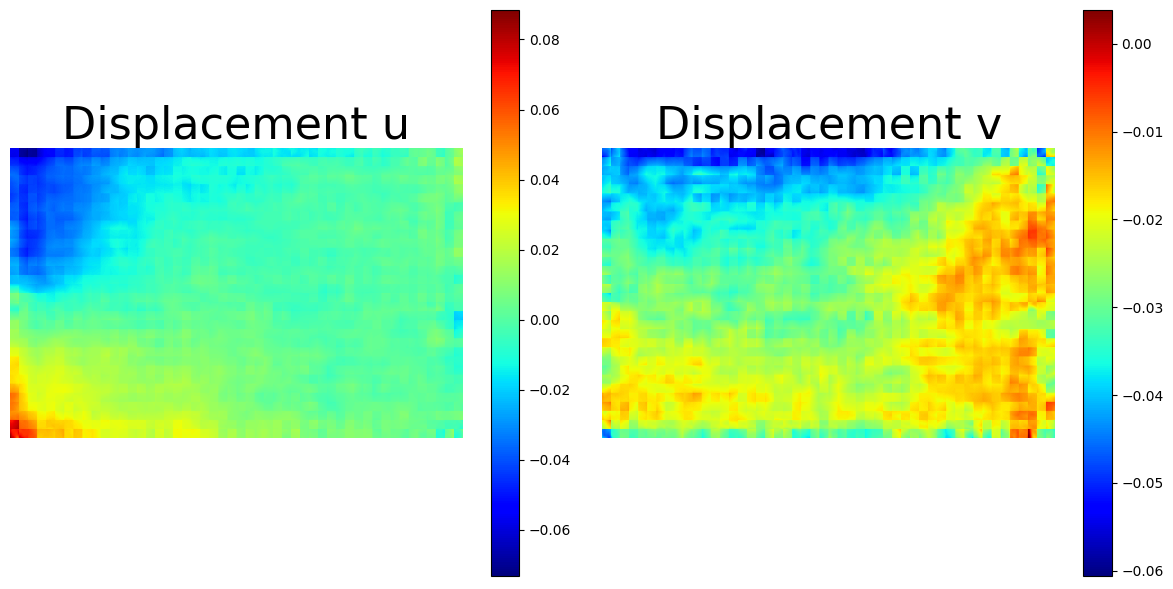

In [ ]:
import torch
import matplotlib.pyplot as plt

# Assuming flow_up is already loaded as a PyTorch tensor on CUDA
# flow_up shape: [1, 2, 432, 360]

def plot_displacement_components(flow_tensor):
    # Remove the batch dimension
    flow_tensor = flow_tensor.squeeze(0)  # Now it's [2, 432, 360]

    # Move to CPU if necessary and extract u and v components
    u = flow_tensor[0].cpu().numpy()  # Displacement u (horizontal component)
    v = flow_tensor[1].cpu().numpy()  # Displacement v (vertical component)

    # Plot the displacement u
    plt.figure(figsize=(12, 6))

    plt.subplot(1, 2, 1)
    plt.imshow(u, cmap='jet')
    cbar1 = plt.colorbar()
    # Set font size of the numbers on the colorbar
    cbar1.ax.tick_params(labelsize=20)
    plt.title('Displacement u', fontsize=32)
    plt.axis('off')

    # Plot the displacement v
    plt.subplot(1, 2, 2)
    plt.imshow(v, cmap='jet')
    cbar2 = plt.colorbar()
    cbar2.ax.tick_params(labelsize=20)
    plt.title('Displacement v', fontsize=32)
    plt.axis('off')

    plt.tight_layout()
    plt.show()

# Example of using the function
#flow_up = torch.randn(1, 2, 432, 360).cuda()  # Replace this with your actual flow tensor on CUDA
plot_displacement_components(flow_up)


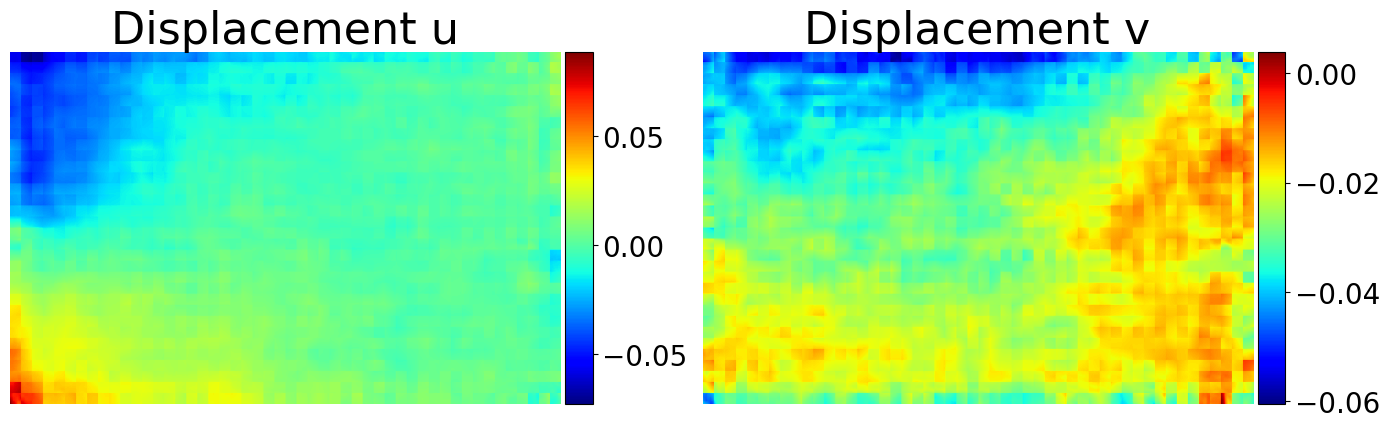

In [ ]:
import torch
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable

# Assuming flow_up is already loaded as a PyTorch tensor on CUDA
# flow_up shape: [1, 2, 432, 360]

def plot_displacement_components(flow_tensor):
    # Remove the batch dimension
    flow_tensor = flow_tensor.squeeze(0)  # Now it's [2, 432, 360]

    # Move to CPU if necessary and extract u and v components
    u = flow_tensor[0].cpu().numpy()  # Displacement u (horizontal component)
    v = flow_tensor[1].cpu().numpy()  # Displacement v (vertical component)

    # Plot the displacement u
    fig, axes = plt.subplots(1, 2, figsize=(14, 7))

    # For u (horizontal displacement)
    ax_u = axes[0]
    im_u = ax_u.imshow(u, cmap='jet')
    ax_u.set_title('Displacement u', fontsize=32)
    ax_u.axis('off')

    # Adjust colorbar shape for u
    divider_u = make_axes_locatable(ax_u)
    cax_u = divider_u.append_axes("right", size="5%", pad=0.05)
    cbar_u = fig.colorbar(im_u, cax=cax_u)
    cbar_u.ax.tick_params(labelsize=20)

    # For v (vertical displacement)
    ax_v = axes[1]
    im_v = ax_v.imshow(v, cmap='jet')
    ax_v.set_title('Displacement v', fontsize=32)
    ax_v.axis('off')

    # Adjust colorbar shape for v
    divider_v = make_axes_locatable(ax_v)
    cax_v = divider_v.append_axes("right", size="5%", pad=0.05)
    cbar_v = fig.colorbar(im_v, cax=cax_v)
    cbar_v.ax.tick_params(labelsize=20)

    # Adjust layout and display the plot
    plt.tight_layout()
    plt.show()

# Example of using the function
#flow_up = torch.randn(1, 2, 432, 360).cuda()  # Replace this with your actual flow tensor on CUDA
plot_displacement_components(flow_up)


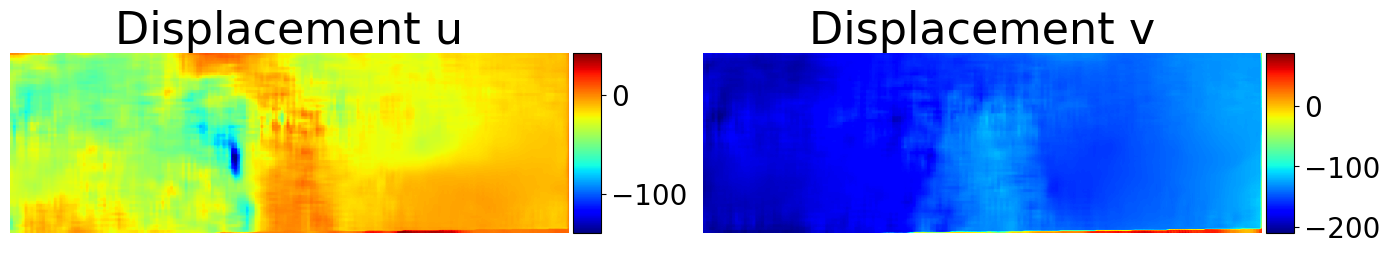

In [ ]:
import torch
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
import os

# Assuming flow_up is already loaded as a PyTorch tensor on CUDA
# flow_up shape: [1, 2, 432, 360]

def plot_and_save_displacement_components(flow_tensor, save_path):
    # Remove the batch dimension
    flow_tensor = flow_tensor.squeeze(0)  # Now it's [2, 432, 360]

    # Move to CPU if necessary and extract u and v components
    u = flow_tensor[0].cpu().numpy()  # Displacement u (horizontal component)
    v = flow_tensor[1].cpu().numpy()  # Displacement v (vertical component)

    # Create the directory if it doesn't exist
    if not os.path.exists(save_path):
        os.makedirs(save_path)

    # Plot the displacement u
    fig, axes = plt.subplots(1, 2, figsize=(14, 7))

    # For u (horizontal displacement)
    ax_u = axes[0]
    im_u = ax_u.imshow(u, cmap='jet')
    ax_u.set_title('Displacement u', fontsize=32)
    ax_u.axis('off')

    # Adjust colorbar shape for u
    divider_u = make_axes_locatable(ax_u)
    cax_u = divider_u.append_axes("right", size="5%", pad=0.05)
    cbar_u = fig.colorbar(im_u, cax=cax_u)
    cbar_u.ax.tick_params(labelsize=20)

    # For v (vertical displacement)
    ax_v = axes[1]
    im_v = ax_v.imshow(v, cmap='jet')
    ax_v.set_title('Displacement v', fontsize=32)
    ax_v.axis('off')

    # Adjust colorbar shape for v
    divider_v = make_axes_locatable(ax_v)
    cax_v = divider_v.append_axes("right", size="5%", pad=0.05)
    cbar_v = fig.colorbar(im_v, cax=cax_v)
    cbar_v.ax.tick_params(labelsize=20)

    # Adjust layout
    plt.tight_layout()

    # Save the plot as a PNG file to the specified path
    u_path = os.path.join(save_path, 'displacement_u.png')
    v_path = os.path.join(save_path, 'displacement_v.png')

    # Save the figure
    fig.savefig(os.path.join(save_path, 'displacement_components.png'), dpi=300)

    # Show the plot
    plt.show()

# Example of using the function and saving to path E:\\results
save_path = 'H:\YangTasks\img_THD29'  # Set your save directory here
plot_and_save_displacement_components(flow_up, save_path)
